BEER CLASSIFICATION PROJECT

# Notebook 2 - EDA

This notebook will be used to perform a few different analyses to better understand our data before fitting any models. Since we performed univariate analysis in our previous notebook, we'll just run a few straightforward summaries here (correlation plot, boxplots, etc.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import rgb2hex
import seaborn as sns

In [2]:
sns.set_style("white")
sns.set_context("talk")
sns.set_palette("Blues")
main_cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
main_color = main_cmap(0.75)
main_color = rgb2hex(main_color)

# Import

## Import File

First, we'll bring in the processed file from our previous notebook.

In [3]:
df = pd.read_parquet('./data/processed/df_processed')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3170 entries, 0 to 3196
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   abv          3170 non-null   float64 
 1   min_ibu      3170 non-null   int64   
 2   max_ibu      3170 non-null   int64   
 3   astringency  3170 non-null   int64   
 4   body         3170 non-null   int64   
 5   alcohol      3170 non-null   int64   
 6   bitter       3170 non-null   int64   
 7   sweet        3170 non-null   int64   
 8   sour         3170 non-null   int64   
 9   salty        3170 non-null   int64   
 10  fruits       3170 non-null   int64   
 11  hoppy        3170 non-null   int64   
 12  spices       3170 non-null   int64   
 13  malty        3170 non-null   int64   
 14  style_l1     3170 non-null   category
dtypes: category(1), float64(1), int64(13)
memory usage: 375.9 KB
None


,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty,style_l1
0,5.3,25,50,13,32,9,47,74,33,0,33,57,8,111,Altbier
1,7.2,25,50,12,57,18,33,55,16,0,24,35,12,84,Altbier
2,5.0,25,50,14,37,6,42,43,11,0,10,54,4,62,Altbier
3,8.5,25,50,13,55,31,47,101,18,1,49,40,16,119,Altbier
4,7.2,25,50,25,51,26,44,45,9,1,11,51,20,95,Altbier


# EDA

## Correlation

In [4]:
corr = df.corr()

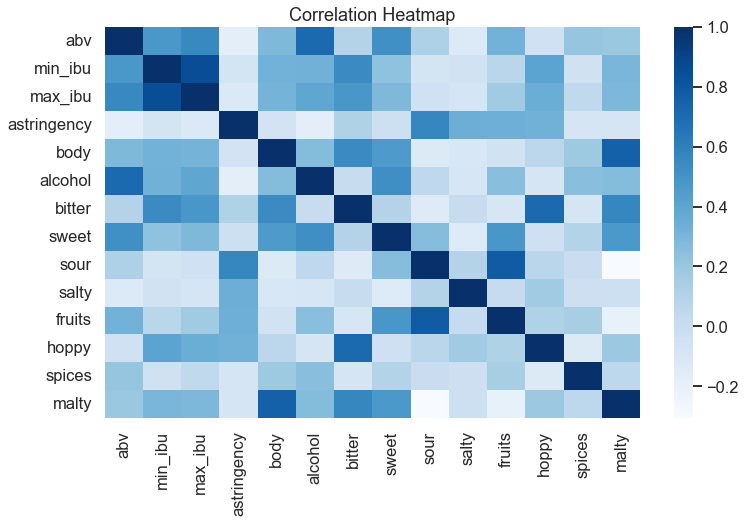

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Blues', ax=ax)
fig.subplots_adjust(bottom=0.2)
plt.title('Correlation Heatmap')
plt.savefig('figures/corrplot.png')

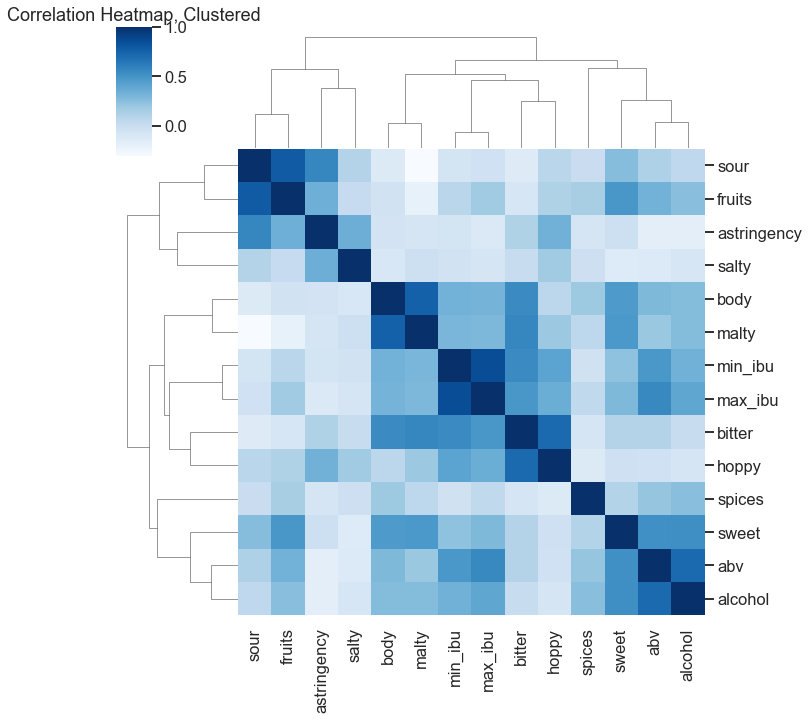

In [6]:
sns.clustermap(corr, cmap='Blues')
plt.title("Correlation Heatmap, Clustered")
plt.savefig('figures/corrplot_clustered.png')

This looks relatively healthy - there are some groups that are in the pink (~0.25 correlation), and a few clusters with serious multicollinearity, but we can deal with those on an individual basis, depending on which model type we want to use.

## Boxplots

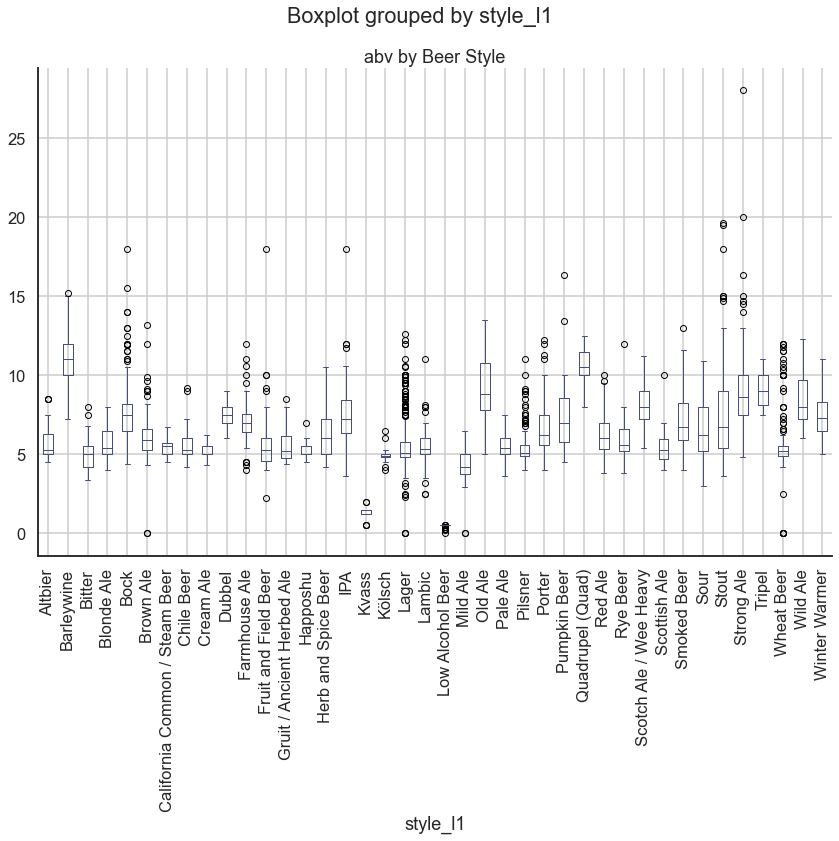

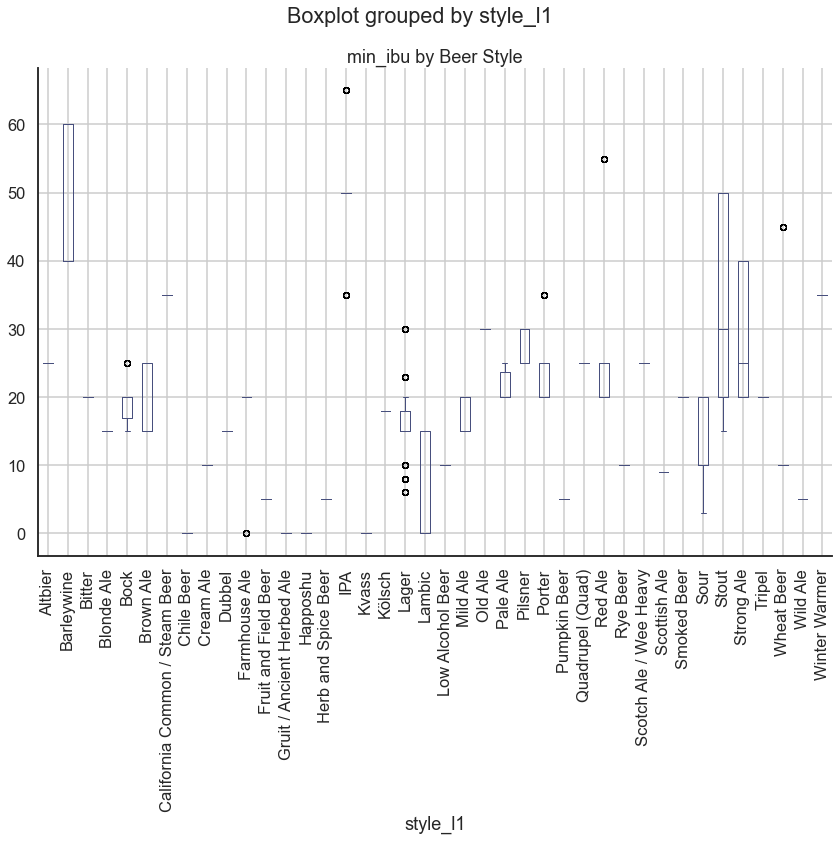

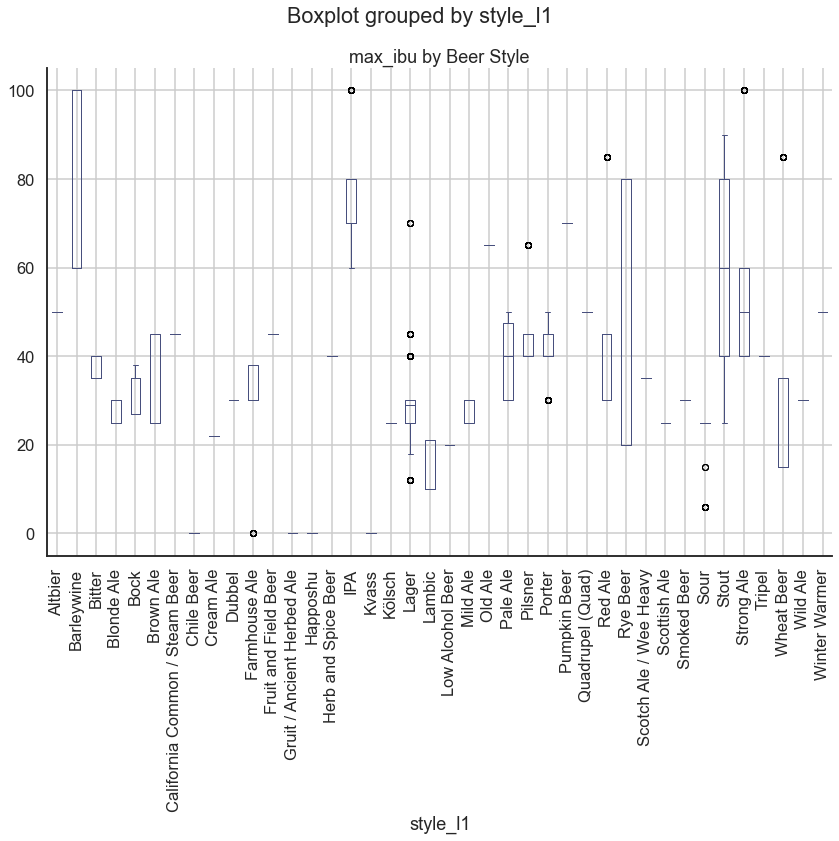

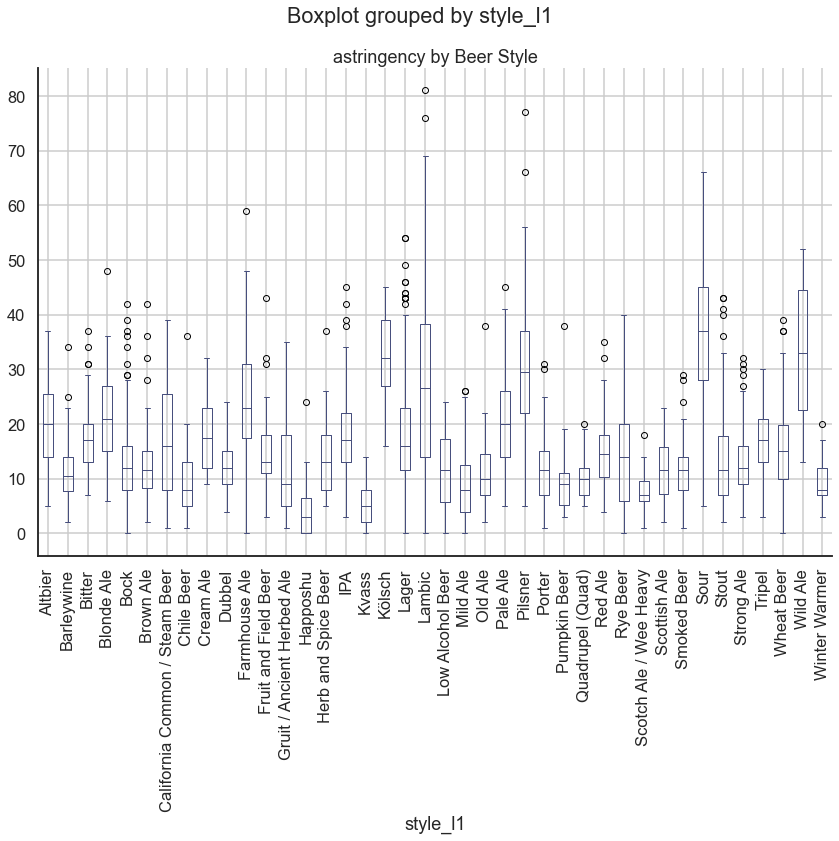

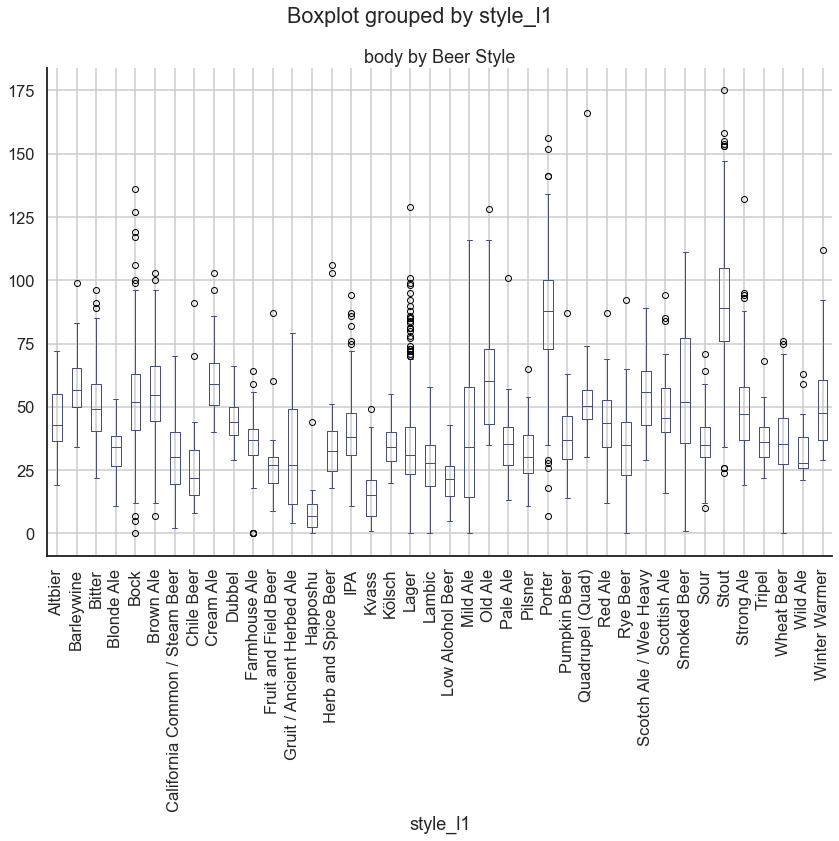

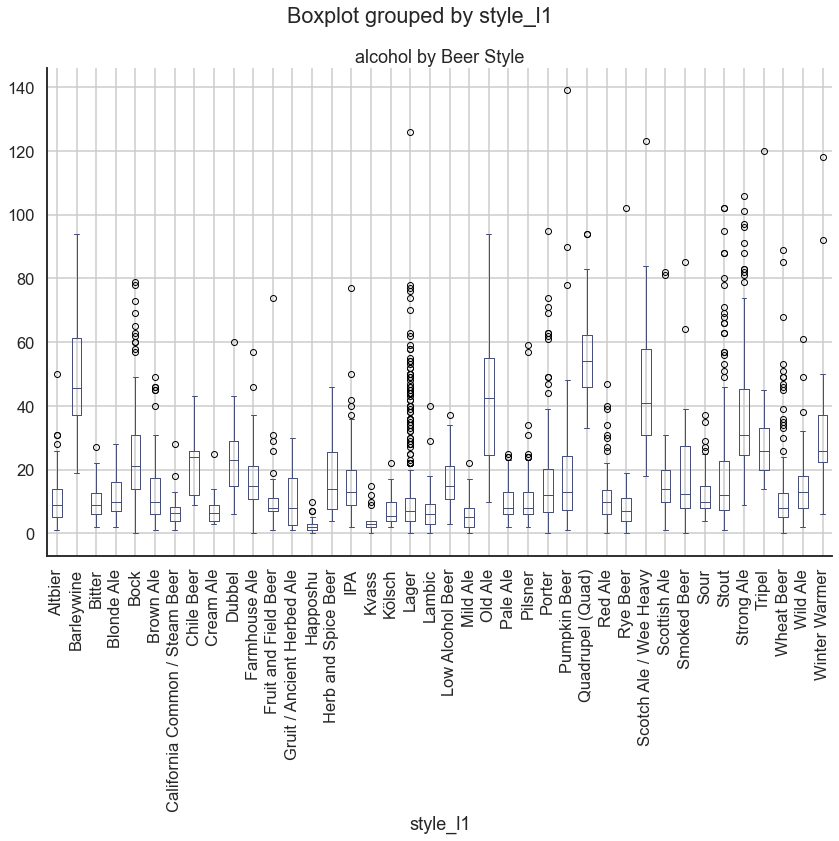

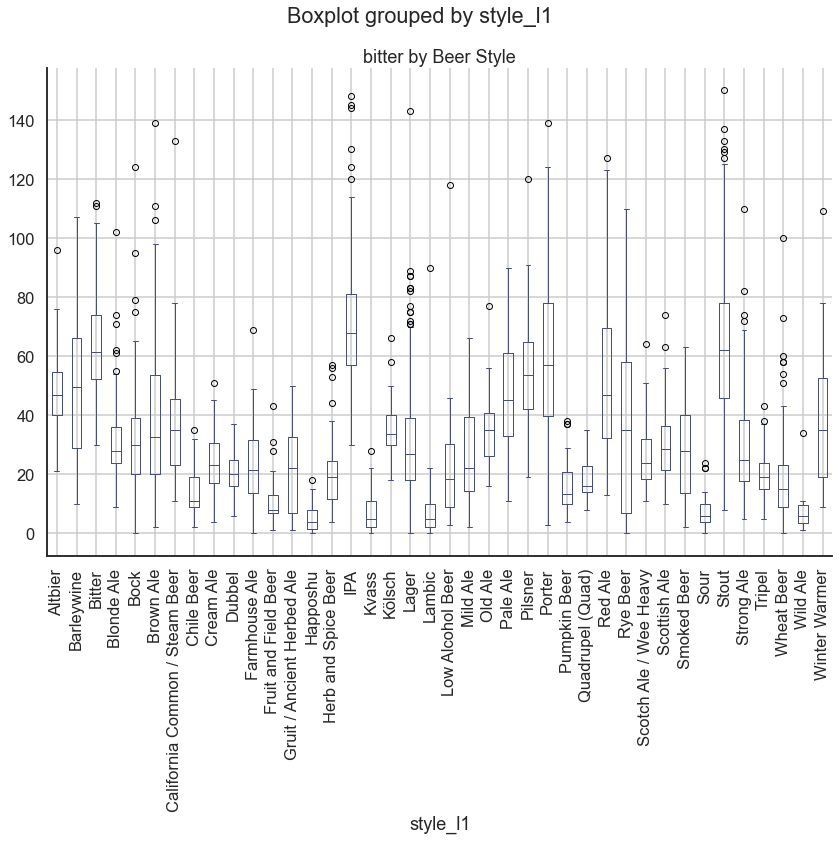

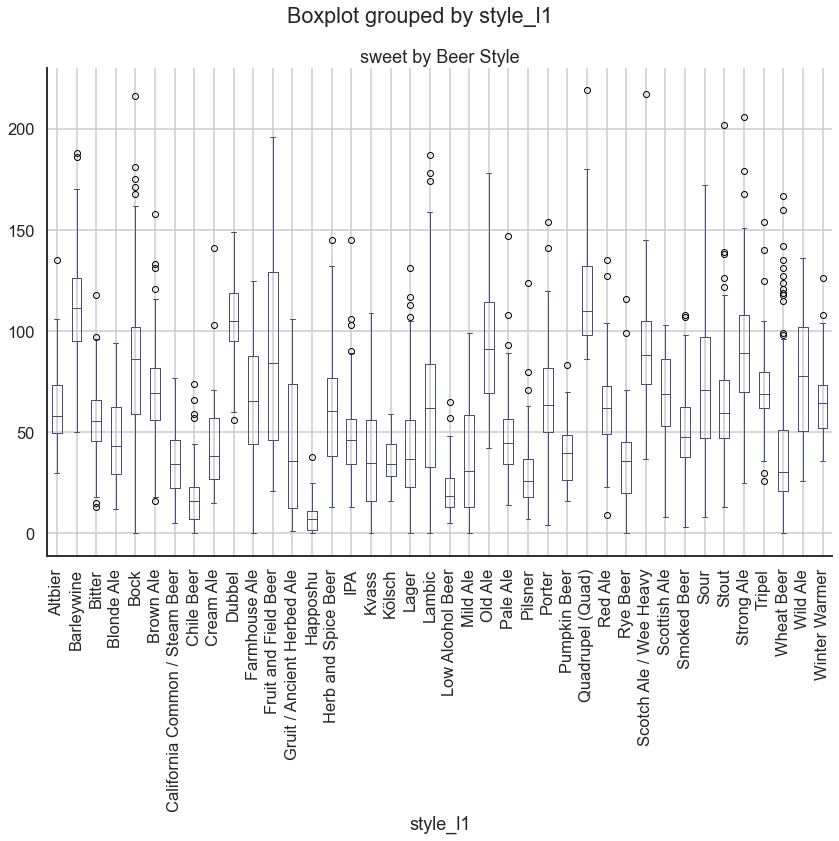

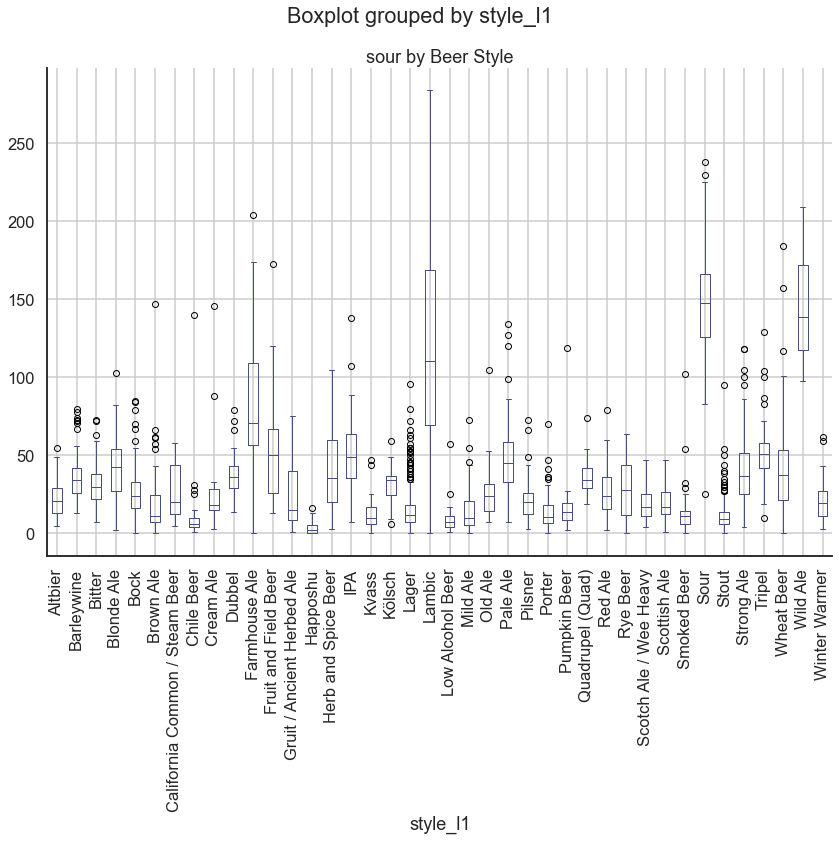

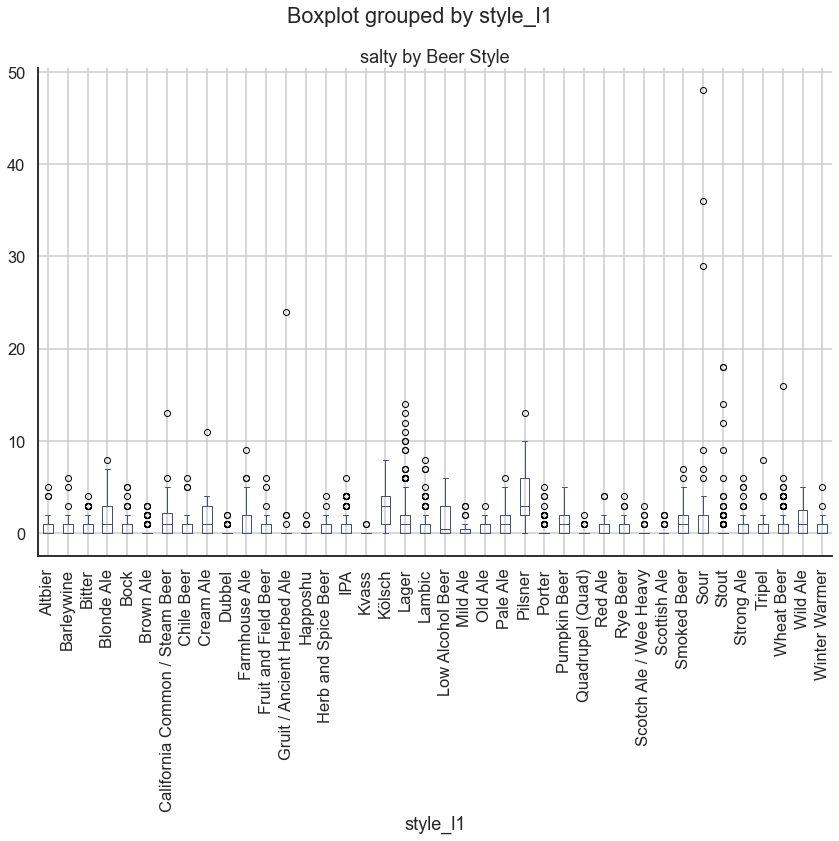

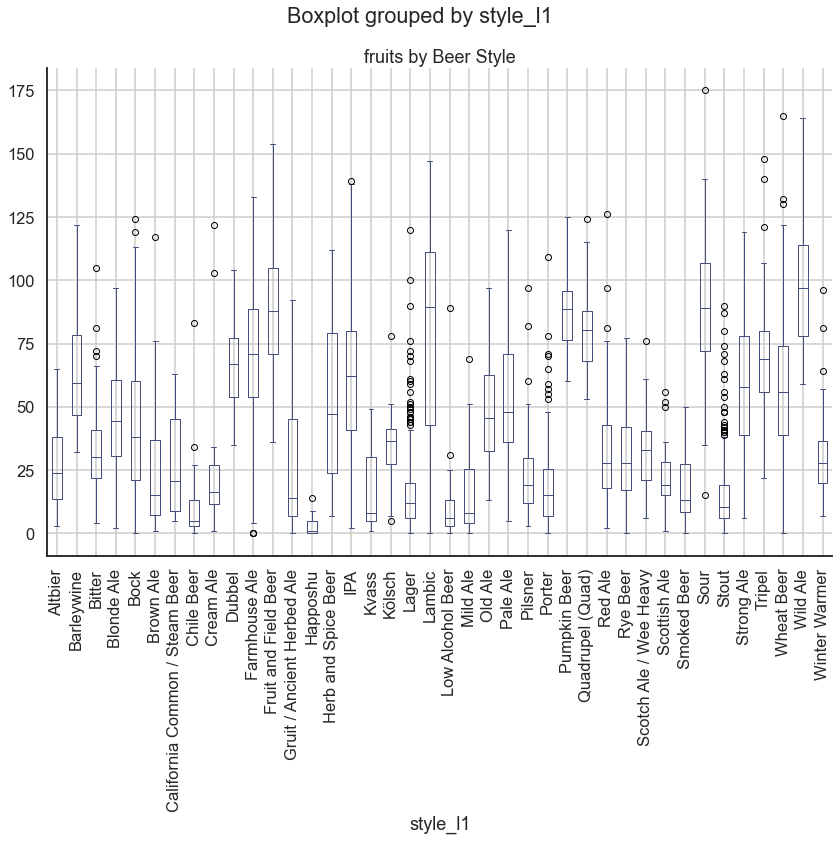

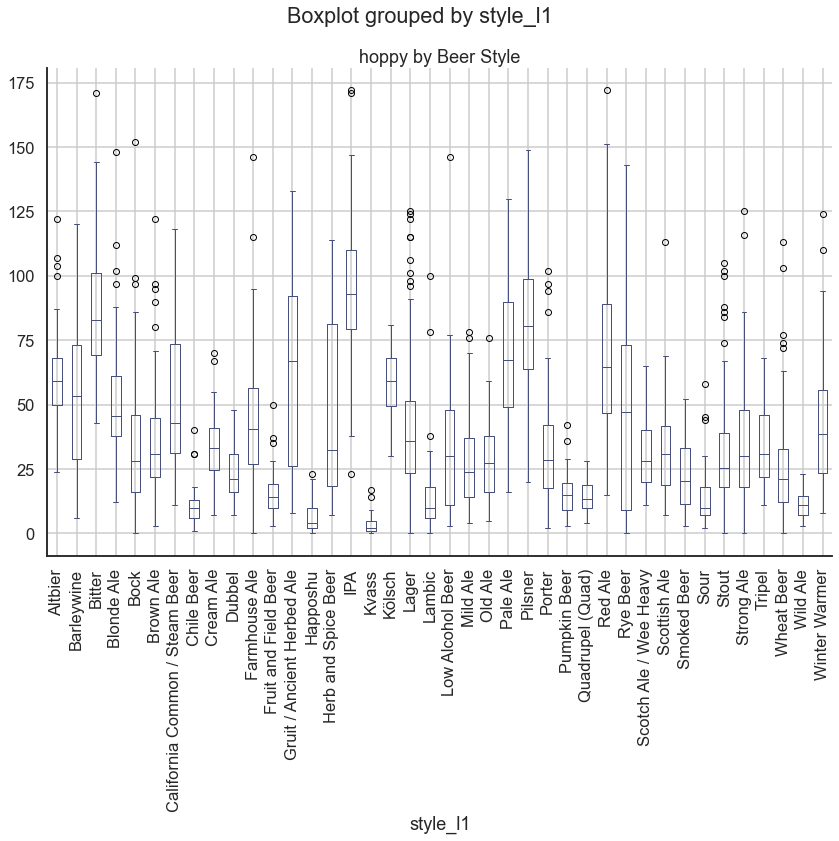

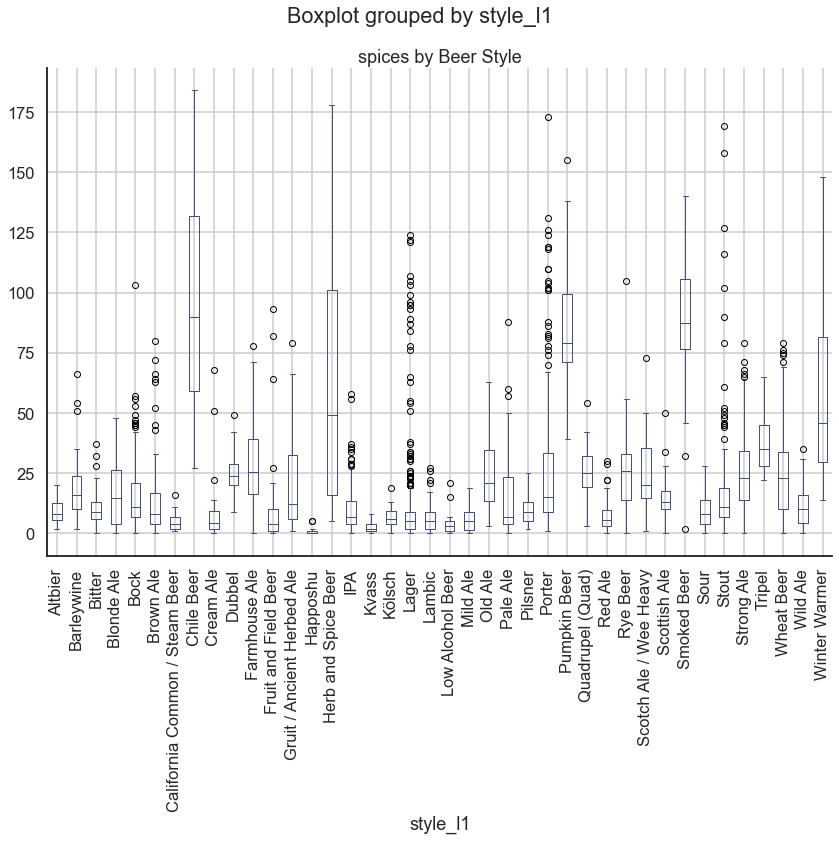

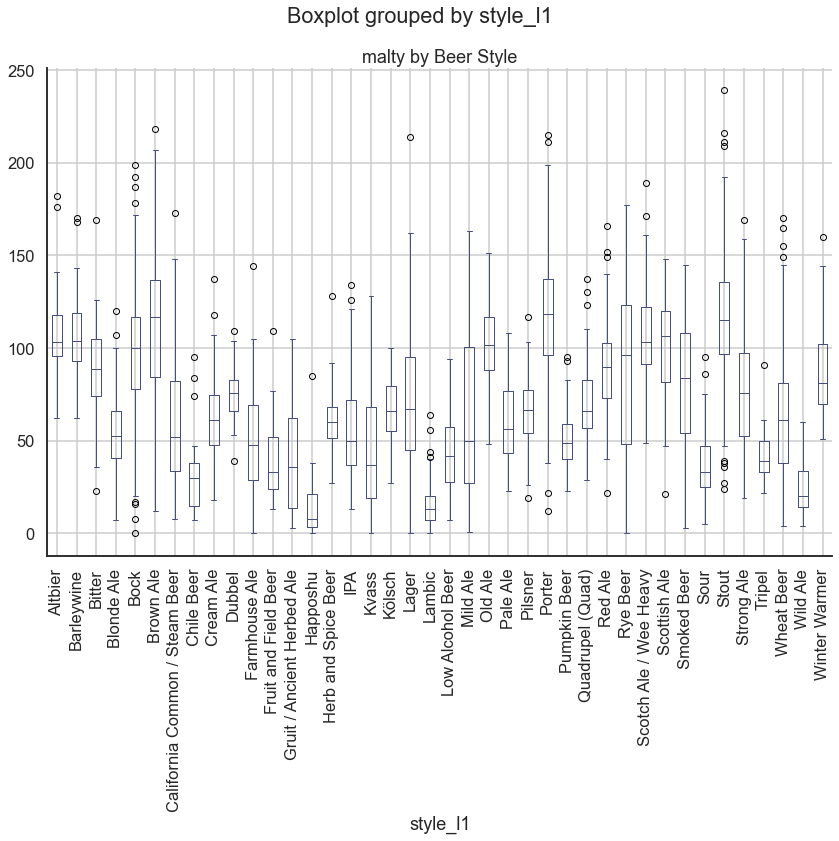

In [7]:
for col in df.select_dtypes(exclude='category'): # Leave out beer style vs beer style
    fig, ax = plt.subplots(figsize=(12, 12))
    df.boxplot(column=col, by='style_l1', rot=90, figsize=(8, 6), color=main_color, ax=ax)
    sns.despine()
    plt.title(f'{col} by Beer Style')
    plt.tight_layout()
    plt.savefig(f'figures/boxplot_dv_{col}.png')

It's a lot to look at, but with many of the features, we can see clear differentation between beer types based on those features. This is promising - the hope is that the combination of all the features gives our model enough to distinguish between classes.

## Spider Plots

Time to try a fun new vis! The fact that each beer type has a profile along 14 dimensions lends itself well to a 'spider' plot, or radar plot. A quick Google didn't reveal any built-in libraries, but looks like we could do this with either Plotly or matplotlib.

Plotly's implementation actually didn't look great (the area has a partial border), so let's use matplotlib with some manual work! We'll borrow from it and adjust / add comments as needed.
 
[Plotly link](https://plotly.com/python/radar-chart/)

[Matplotlib](https://aakashkh.github.io/python/visualisation/2019/08/26/Plotting-Seaborn-Radar.html)

In [8]:
spider_cols = ['astringency', 'body', 'alcohol', 'bitter', 'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty']
df_agg = df[['style_l1'] + spider_cols].groupby('style_l1', as_index=False).mean()
df_agg.iloc[:, 1:] = df_agg.iloc[:, 1:] / (df_agg.iloc[:, 1:].max(axis=0) * 1.05)
print(df_agg.info())

df_agg.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   style_l1     40 non-null     category
 1   astringency  40 non-null     float64 
 2   body         40 non-null     float64 
 3   alcohol      40 non-null     float64 
 4   bitter       40 non-null     float64 
 5   sweet        40 non-null     float64 
 6   sour         40 non-null     float64 
 7   salty        40 non-null     float64 
 8   fruits       40 non-null     float64 
 9   hoppy        40 non-null     float64 
 10  spices       40 non-null     float64 
 11  malty        40 non-null     float64 
dtypes: category(1), float64(11)
memory usage: 5.0 KB
None


,style_l1,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty
0,Altbier,0.526897,0.472369,0.202220,0.650561,0.514395,0.146564,0.192047,0.262008,0.616501,0.091376,0.865675
1,Barleywine,0.295879,0.603946,0.851150,0.659201,0.898091,0.239797,0.139679,0.630080,0.537708,0.174633,0.864047
2,Bitter,0.449575,0.529392,0.170567,0.863720,0.452232,0.208627,0.179573,0.332119,0.869169,0.106157,0.719168
3,Blonde Ale,0.548677,0.344669,0.200145,0.433023,0.374068,0.282211,0.460563,0.456502,0.508786,0.154302,0.439643
4,Bock,0.348518,0.557577,0.422946,0.416704,0.676283,0.168501,0.123172,0.418950,0.334719,0.158283,0.801906


In [13]:
def make_spiders(df, row, axs, color, title):
    
    categories = list(df)[1:]
    N = len(categories)
    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    a = int(np.floor(row / 8))
    b = int(row % 8)

    axs[a, b].set_theta_offset(np.pi / 2)
    axs[a, b].set_theta_direction(-1)

    axs[a, b].set_rlabel_position(0)
    axs[a, b].set_ylim(0,1)

    axs[a, b].set_xticklabels([])
    axs[a, b].set_yticklabels([])

    values = df.reset_index().iloc[row, 1:].values.tolist()[1:]
    values += values[:1]

    color_cmap = sns.dark_palette(color, as_cmap=True)
    dark_color = color_cmap(0.25)

    axs[a, b].plot(angles, values, color = dark_color, linewidth=1.5, linestyle='solid')
    axs[a, b].fill(angles, values, color = color, alpha = 0.6)


    full_title = title
    axs[a, b].set_title(full_title, fontsize=10, x = 0.5, y = 1.05)

    return

In [14]:
def make_spider(df, row, ax, color, title):
    
    categories = list(df)[1:]
    N = len(categories)
    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    a = int(np.floor(row / 4))
    b = int(row % 4)
  
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
 
    ax.set_xticks(angles[:-1], categories, color='black', size=14)
    ax.set_yticks([])
    ax.tick_params(axis='x', which='both', pad=10)

    ax.set_rlabel_position(0)
    ax.set_ylim(0, 1)

    color_cmap = sns.dark_palette(color, as_cmap=True)
    dark_color = color_cmap(0.25) 
    
    values = df.reset_index().iloc[row, 1:].values.tolist()[1:]
    values += values[:1]
    ax.plot(angles, values, color = dark_color, linewidth=3, linestyle='solid')
    ax.fill(angles, values, color = color, alpha = 0.6)
 
    ax.set_title(title, fontsize=20, x = 0.5, y = 1.1)

    return

In [11]:
df_agg.describe()

,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.414873,0.441619,0.311810,0.411231,0.479896,0.239670,0.243567,0.419602,0.380206,0.225415,0.559433
std,0.193307,0.169745,0.218285,0.229081,0.203629,0.211563,0.198846,0.255335,0.221733,0.227777,0.228441
min,0.119878,0.089502,0.041473,0.070572,0.065994,0.023831,0.023010,0.028937,0.037912,0.006755,0.122805
25%,0.300155,0.343509,0.176445,0.258163,0.323134,0.115359,0.115869,0.223257,0.230168,0.092221,0.391958
50%,0.352121,0.403346,0.243454,0.390028,0.501348,0.176178,0.180204,0.326297,0.336516,0.148835,0.531220
75%,0.468564,0.540065,0.369696,0.522641,0.585374,0.267731,0.317655,0.622959,0.508972,0.250146,0.727591
max,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381


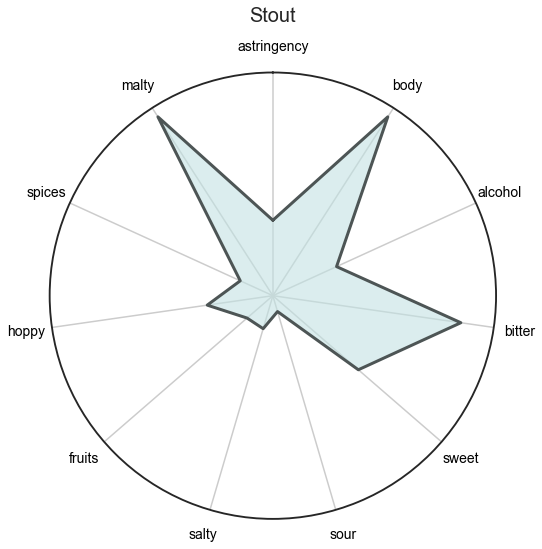

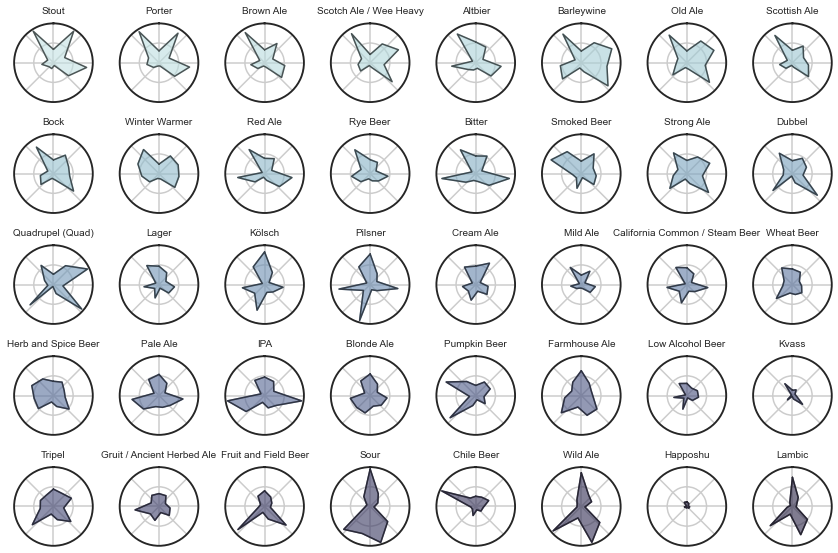

In [16]:
df_agg = df_agg.sort_values(by='malty', ascending=False)

# Set up single figure
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'), figsize=(8, 12))

# Set up full figure
fig2, axs = plt.subplots(5, 8, subplot_kw=dict(projection='polar'), figsize=(12, 8))

for i in range(df_agg.shape[0]):
    if i == 0:
        make_spider(df_agg, row=i, ax=ax, color=main_cmap(i/df_agg.shape[0]), title=df_agg.iloc[i, 0])
        fig.savefig(f'figures/spider_{df_agg.iloc[i, 0]}.png')
    make_spiders(df_agg, row=i, axs=axs, color=main_cmap(i/df_agg.shape[0]), title=df_agg.iloc[i, 0])

plt.tight_layout()
plt.savefig(f'figures/spiders_all.png')

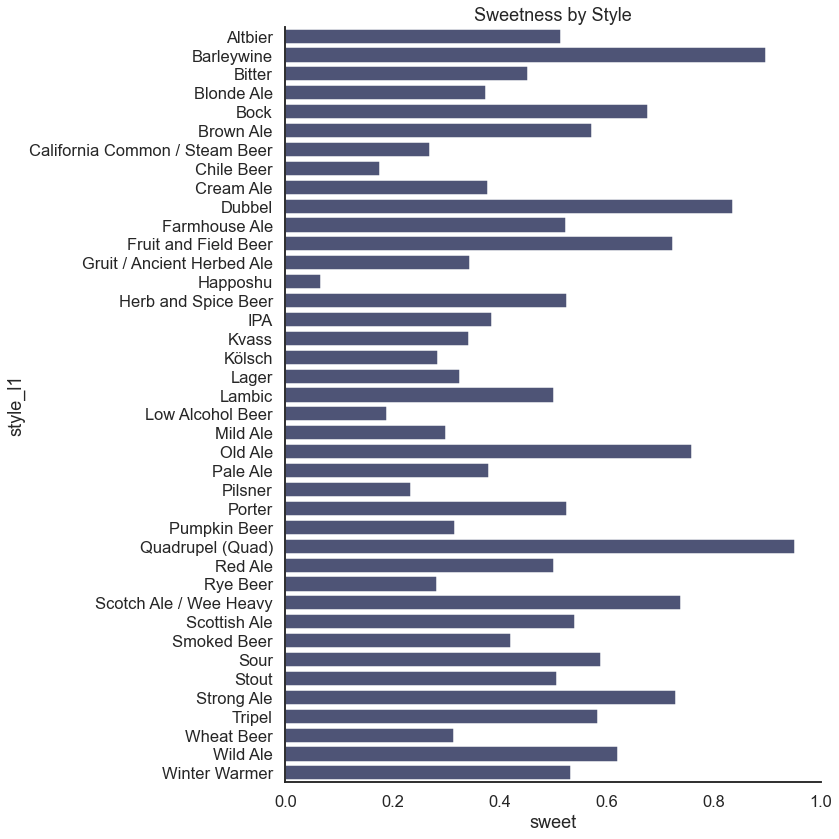

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.barplot(data=df_agg, x='sweet', y='style_l1', color=main_color)
sns.despine()
plt.title('Sweetness by Style')
plt.tight_layout()
plt.savefig('figures/sweetness_by_style.png')